#### Model based on Functional API
- 복잡한 구조의 모델 생성
- Subclass가 어려운 경우 해당 방법으로 모델 생성
- 기본 동작
    * 함수 호출과 인자 전달 방식
    * 인자 --- Layer Instance
    * Model() 생성자에 인자로 전달
        - inputs : 입력층에 해당하는 Layer Instance 지정
        - outputs : 출력층에 해당하는 Layer Instance 지정

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.datasets.mnist import load_data

import numpy as np
import matplotlib.pyplot as plt

[1] 데이터 로딩 및 준비

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

[2] 모델 생성

[2-1] 모델 설계

In [3]:
# 입력 객체 생성
input = Input(shape=(28, 28), name='data_input')

In [4]:
# 은닉층 객체 생성
flat_layer = Flatten(name='flat_layer')(input)

In [5]:
# 출력층 객체 생성 : 퍼셉트론 10개, 활성화함수 softmax
output = Dense(10, activation='softmax')(flat_layer)

In [6]:
# 모델 객체 생성
funcModel = Model(inputs=input, outputs=output, name='Func_Model')

In [7]:
# 모델 정보 확인
funcModel.summary()

Model: "Func_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_input (InputLayer)      [(None, 28, 28)]          0         
_________________________________________________________________
flat_layer (Flatten)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#### 서브클래스 방식 모델

In [8]:
class MMModel(Model):
    
    # 생성자 메서드 정의
    def __init__(self, hidden_unit, output_unit, hidden_nums):
        # 부모 클래스 생성
        super(MMModel, self).__init__()

        # 속성
        self.flatten_layer = Flatten()      # shape 지정 X
        self.hidden_layers = []
        for n in range(hidden_nums):
            self.hidden_layers.append(Dense(hidden_unit, activation = 'relu',
            name = f'dense_{n}'))
        self.out_layer = Dense(output_unit, activation = 'softmax')
    
    # 실행함수 정의
    def call(self, x):
        print('MMModel의 call()')
        ret = self.flatten_layer(x)
        for i in self.hidden_layers:
            ret = i(ret)
        return self.out_layer(ret)

In [10]:
mm_Model2 = MMModel(52, 10, 2)

In [11]:
mm_Model2(Input(shape=(28, 28)))

MMModel의 call()


<tf.Tensor 'mm_model_1/Identity:0' shape=(None, 10) dtype=float32>

In [12]:
mm_Model2.summary()

Model: "mm_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_0 (Dense)              (None, 52)                40820     
_________________________________________________________________
dense_1 (Dense)              (None, 52)                2756      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                530       
Total params: 44,106
Trainable params: 44,106
Non-trainable params: 0
_________________________________________________________________


In [56]:
mm_Model3 = MMModel(5, 20)

In [57]:
mm_Model3(Input(shape=(36, 36)))

MMModel의 call()


<KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'mm_model_3')>

In [58]:
mm_Model3.summary()

Model: "mm_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  6485      
_________________________________________________________________
dense_15 (Dense)             multiple                  120       
Total params: 6,605
Trainable params: 6,605
Non-trainable params: 0
_________________________________________________________________


[2-2] 모델 생성

In [35]:
funcModel.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [ ]:
mm_Model3.compile()

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data


In [15]:
(X_train,y_train), (X_test,y_test) = load_data()

In [16]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [18]:
X_train_in = X_train[...,tf.newaxis]
X_test_in = X_test[...,tf.newaxis]

In [22]:
X_train_in.shape, X_test_in.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [46]:
class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN,self).__init__()
        #convolution 적용(filter 32)
        self.convolution = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32,(3,3), input_shape=(28,28,1)),
            tf.keras.layers.ReLU()
        ])
        #풀링 적용
        self.pool = tf.keras.Sequential([
            tf.keras.layers.MaxPooling2D((2,2))
        ])
        self.outlayer = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Softmax()    
        ])
    def call(self, x):
        x = self.convolution(x)
        x = self.pool(x)
        x = self.outlayer(x)
        return x        

In [47]:
model = CNN()
model.build(input_shape=(128,28,28,1))

In [48]:
model.summary()

Model: "cnn_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_16 (Sequential)   (None, 26, 26, 32)        320       
_________________________________________________________________
sequential_17 (Sequential)   multiple                  0         
_________________________________________________________________
sequential_18 (Sequential)   multiple                  54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')

In [51]:
history= model.fit(X_train_in, y_train, validation_data=(X_test_in, y_test),epochs =10,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0102 - accuracy: 0.9978 - val_loss: 0.0520 - val_accuracy: 0.9854
Epoch 2/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.0546 - val_accuracy: 0.9847
Epoch 3/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0550 - val_accuracy: 0.9849
Epoch 4/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0577 - val_accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0600 - val_accuracy: 0.9840
Epoch 6/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0641 - val_accuracy: 0.9831
Epoch 7/10
60000/60000 [====================

In [85]:
xx = X_test_in[0].reshape(1,28,28,1)
xx.shape

(1, 28, 28, 1)

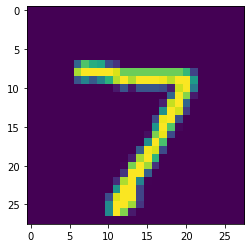

In [90]:
plt.imshow(X_test_in[0])

In [91]:
pred = model.predict(X_test_in)
pred.shape

(10000, 10)

In [92]:
np.argmax(pred[0])

7